In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [88]:
start = '2010-01-01'
    end = '2023-09-08'

df=pdr.DataReader('NVDA','tiingo',start,end,api_key='f88878d246bbcf9e6cba01ec8f27e9cfcfc79a34')

df.head()

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


close     high    low   open    volume  \
symbol date                                                                
NVDA   2010-01-04 00:00:00+00:00  18.49  18.6200  18.11  18.51  20005100   
       2010-01-05 00:00:00+00:00  18.76  18.9600  18.42  18.51  18216200   
       2010-01-06 00:00:00+00:00  18.88  18.9200  18.57  18.75  16229200   
       2010-01-07 00:00:00+00:00  18.51  18.8600  18.37  18.78  13694800   
       2010-01-08 00:00:00+00:00  18.55  18.6821  18.25  18.36  11954200   

                                  adjClose   adjHigh    adjLow   adjOpen  \
symbol date                                                                
NVDA   2010-01-04 00:00:00+00:00  4.241386  4.271207  4.154219  4.245974   
       2010-01-05 00:00:00+00:00  4.303321  4.349198  4.225329  4.245974   
       2010-01-06 00:00:00+00:00  4.330847  4.340023  4.259737  4.301027   
       2010-01-07 00:00:00+00:00  4.245974  4.326260  4.213859  4.307909   
       2010-01-08 00:00:00+00:00  4.255149  4.285452  4.186333  4.211566   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
NVDA   2010-01-04 00:00:00+00:00   80020400      0.0          1.0  
       2010-01-05 00:00:00+00:00   72864800      0.0          1.0  
       2010-01-06 00:00:00+00:00   64916800      0.0          1.0  
       2010-01-07 00:00:00+00:00   54779200      0.0          1.0  
       2010-01-08 00:00:00+00:00   47816800      0.0          1.0

In [89]:
df.tail()

close      high      low    open    volume  \
symbol date                                                                     
NVDA   2023-09-01 00:00:00+00:00  485.09  498.0000  481.416  497.62  46383030   
       2023-09-05 00:00:00+00:00  485.48  488.5081  478.600  482.23  38265258   
       2023-09-06 00:00:00+00:00  470.61  485.4900  465.800  484.41  46866957   
       2023-09-07 00:00:00+00:00  462.41  463.4400  451.520  455.25  43332989   
       2023-09-08 00:00:00+00:00  455.72  466.0600  452.710  459.42  47389994   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
NVDA   2023-09-01 00:00:00+00:00  485.048773  497.957676  481.375085   
       2023-09-05 00:00:00+00:00  485.438740  488.466582  478.559324   
       2023-09-06 00:00:00+00:00  470.610000  485.490000  465.800000   
       2023-09-07 00:00:00+00:00  462.410000  463.440000  451.520000   
       2023-09-08 00:00:00+00:00  455.720000  466.060000  452.710000   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
NVDA   2023-09-01 00:00:00+00:00  497.577708   46383030     0.00          1.0  
       2023-09-05 00:00:00+00:00  482.189016   38265258     0.00          1.0  
       2023-09-06 00:00:00+00:00  484.410000   46866957     0.04          1.0  
       2023-09-07 00:00:00+00:00  455.250000   43332989     0.00          1.0  
       2023-09-08 00:00:00+00:00  459.420000   47389994     0.00          1.0

### Converting the Above to Rows and Columns with reset_index()

In [90]:
df=df.reset_index()

In [91]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NVDA,2010-01-04 00:00:00+00:00,18.49,18.6200,18.11,18.51,20005100,4.241386,4.271207,4.154219,4.245974,80020400,0.0,1.0
1,NVDA,2010-01-05 00:00:00+00:00,18.76,18.9600,18.42,18.51,18216200,4.303321,4.349198,4.225329,4.245974,72864800,0.0,1.0
2,NVDA,2010-01-06 00:00:00+00:00,18.88,18.9200,18.57,18.75,16229200,4.330847,4.340023,4.259737,4.301027,64916800,0.0,1.0
3,NVDA,2010-01-07 00:00:00+00:00,18.51,18.8600,18.37,18.78,13694800,4.245974,4.326260,4.213859,4.307909,54779200,0.0,1.0
4,NVDA,2010-01-08 00:00:00+00:00,18.55,18.6821,18.25,18.36,11954200,4.255149,4.285452,4.186333,4.211566,47816800,0.0,1.0


### Selecting only the required column

In [92]:
df=df[['close','high','low','open','volume']]

In [93]:
df

,close,high,low,open,volume
0,18.49,18.6200,18.110,18.51,20005100
1,18.76,18.9600,18.420,18.51,18216200
2,18.88,18.9200,18.570,18.75,16229200
3,18.51,18.8600,18.370,18.78,13694800
4,18.55,18.6821,18.250,18.36,11954200
...,...,...,...,...,...
3439,485.09,498.0000,481.416,497.62,46383030
3440,485.48,488.5081,478.600,482.23,38265258
3441,470.61,485.4900,465.800,484.41,46866957
3442,462.41,463.4400,451.520,455.25,43332989


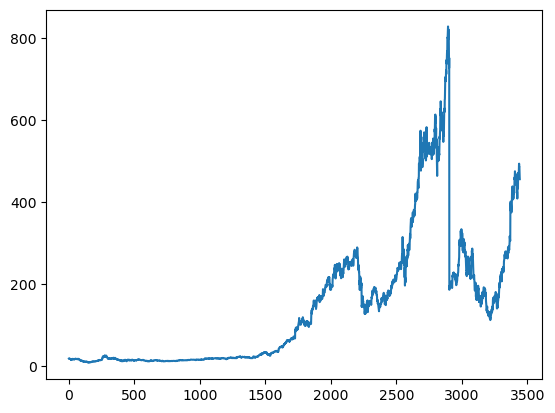

In [94]:
plt.plot(df.close)

### Closing Stock Data Average for 100 days

In [95]:
movingavg100day=df.close.rolling(100).mean()
movingavg100day

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3439    387.8961
3440    390.1014
3441    392.1612
3442    394.1095
3443    395.9665
Name: close, Length: 3444, dtype: float64

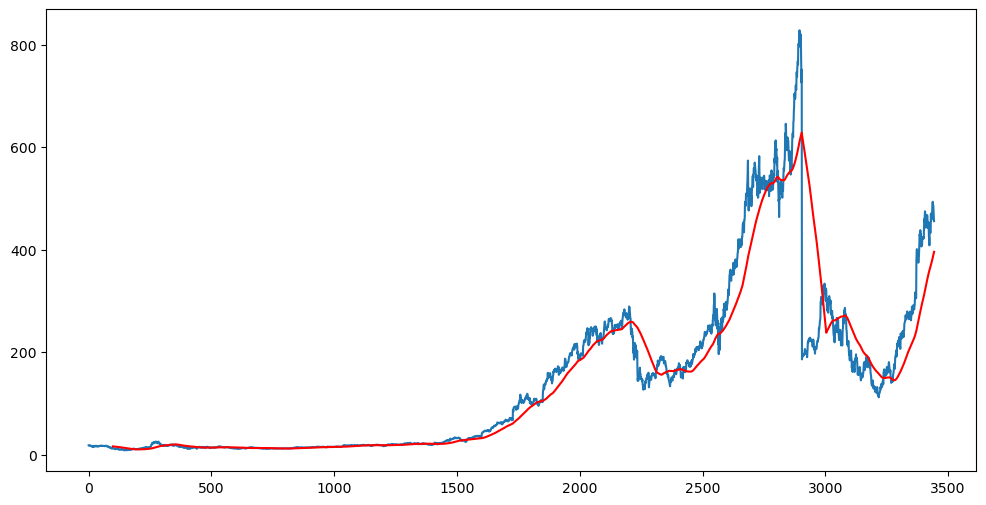

In [96]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(movingavg100day,'r')

### Closing Stock Data for 200 Days

In [97]:
movingavg200day=df.close.rolling(200).mean()
movingavg200day

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3439    295.07240
3440    296.66650
3441    298.22405
3442    299.75225
3443    301.26040
Name: close, Length: 3444, dtype: float64

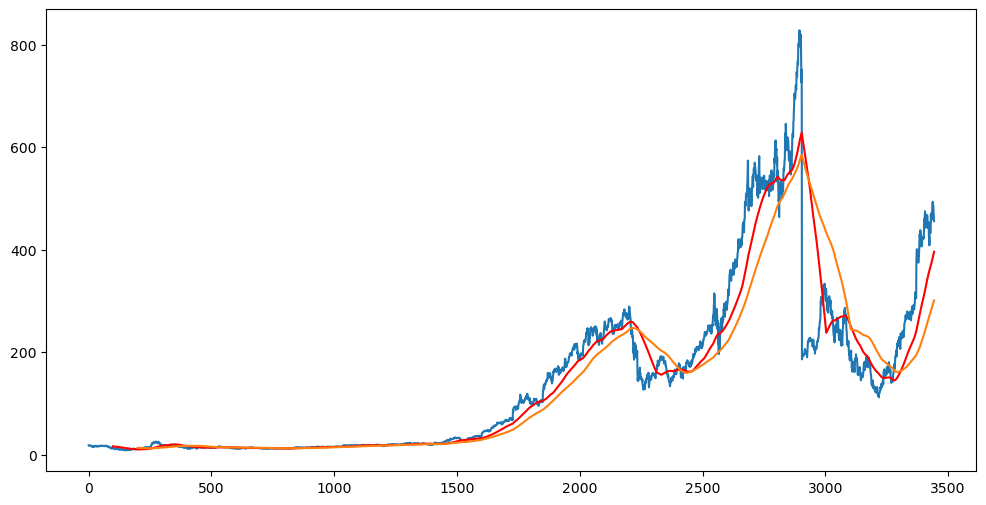

In [98]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(movingavg100day,'r')
plt.plot(movingavg200day)

In [99]:
df.shape

(3444, 5)

### Splitting the data into TRAINING AND TESTING Dataset 

In [100]:
# 70:30  Split
split_point = int(len(df) * 0.70)

train=pd.DataFrame(df['close'][:split_point])
test=pd.DataFrame(df['close'][split_point:])

print(train.shape)
print(test.shape)

(2410, 1)
(1034, 1)


In [101]:
train.head()

,close
0,18.49
1,18.76
2,18.88
3,18.51
4,18.55


In [102]:
test.head()

,close
2410,164.92
2411,161.19
2412,150.79
2413,152.35
2414,153.89


### Using MinMaxScaler from sklearn.preprocessing
### Which converts all the data between 0 and 1 for machine learning model

In [103]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler

MinMaxScaler()

# Training The model

In [104]:
df_train_array=scaler.fit_transform(train)
df_train_array

array([[0.03425408],
       [0.03521673],
       [0.03564457],
       ...,
       [0.591625  ],
       [0.59387117],
       [0.56987637]])

In [105]:
df_train_array.shape

(2410, 1)

In [112]:
#Model Training
x_train=[]

#Training To Be Predicted 
y_train=[]




for i in range(100,df_train_array.shape[0]):
    x_train.append(df_train_array[i-100:i])
    y_train.append(df_train_array[i,0])
    

#### Time series prediction which will depend on the previous 100 days 

In [117]:
x_train

[array([[0.03425408],
        [0.03521673],
        [0.03564457],
        [0.03432539],
        [0.03446801],
        [0.03354101],
        [0.0313305 ],
        [0.03218618],
        [0.03118788],
        [0.0293339 ],
        [0.03047482],
        [0.03020741],
        [0.02911998],
        [0.02701643],
        [0.02801472],
        [0.02612509],
        [0.02769384],
        [0.02569725],
        [0.0232015 ],
        [0.02740862],
        [0.02801472],
        [0.02851387],
        [0.02501983],
        [0.02616074],
        [0.02605378],
        [0.02559029],
        [0.02669555],
        [0.02936956],
        [0.03018959],
        [0.0313305 ],
        [0.03193661],
        [0.02776515],
        [0.02744427],
        [0.02755123],
        [0.02612509],
        [0.02733731],
        [0.02680251],
        [0.02608944],
        [0.02840691],
        [0.02837126],
        [0.02762254],
        [0.0277295 ],
        [0.02954782],
        [0.02865649],
        [0.03090266],
        [0

In [118]:
y_train

[0.01646299614051038,
 0.015179470724033126,
 0.013182875631735168,
 0.013682024404809659,
 0.013610717437227582,
 0.011453681667869975,
 0.00934121275325115,
 0.008191387900990277,
 0.007228743838632333,
 0.00879749712543787,
 0.009724487704004775,
 0.008833150609228901,
 0.010838659072474617,
 0.010294943444661336,
 0.011899350215257912,
 0.012184578085586192,
 0.011150627055646171,
 0.009546220285049603,
 0.010009715574333056,
 0.007941813514453028,
 0.007834853063079926,
 0.007906160030661996,
 0.005695644035617835,
 0.004732999973259891,
 0.005339109197707484,
 0.004875613908424024,
 0.004483425586722642,
 0.006230446292483358,
 0.005089534811170242,
 0.005232148746334375,
 0.005909564938364038,
 0.007264397322423365,
 0.007656585644124747,
 0.00655132764660267,
 0.00416254423260333,
 0.005624337068035765,
 0.00655132764660267,
 0.005303455713916445,
 0.005909564938364038,
 0.005267802230125407,
 0.005945218422155077,
 0.005624337068035765,
 0.00444777210293161,
 0.000882423723828

### Converting the training dataset to np array for faster calculations

In [119]:
x_train,y_train=np.array(x_train),np.array(y_train)

# ML Model

### Here we are using Recurrent Neural Network(RNN) 
### which is a type of Neural Network where the output from the previous step is fed as input to the current step. 

#### sequential Keras model. 
#### sequential model is a linear stack of layers, where you add one layer at a time in a sequential fashion.

In [120]:
seq_model = Sequential()

seq_model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
seq_model.add(Dropout(0.2))

# Long Short-Term Memory (LSTM) layer to the model.an RNN model

# units -Specifies that the LSTM layer should have 50 hidden units (neurons).

#ReLU function that will output the input directly if it is positive, otherwise, it will output zero.

#Rerurn sequence - Tells that the LSTM layer should return sequences, which is typically used when stacking multiple LSTM layers.

#Dropout technique used to prevent overfitting( Process where you do not feed more and more data which will overload the model).

seq_model.add(LSTM(units=60,activation='relu',return_sequences=True))
seq_model.add(Dropout(0.3))


seq_model.add(LSTM(units=80,activation='relu',return_sequences=True,))
seq_model.add(Dropout(0.4))


seq_model.add(LSTM(units=120,activation='relu'))
seq_model.add(Dropout(0.5))

seq_model.add(Dense(units=1))

In [121]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [122]:
seq_model.compile(optimizer='adam',loss='mean_squared_error')
seq_model.fit(x_train,y_train,epochs=50)

# An epoch is one complete pass through the entire training dataset. 
# optimizer is an optimization algorithm that will be used during training.
# In this case, 'adam' is used, which stands for the Adam optimization algorithm. 

Epoch 1/50
73/73 [==============================] - 18s 166ms/step - loss: 0.0218
Epoch 2/50
73/73 [==============================] - 12s 168ms/step - loss: 0.0058
Epoch 3/50
73/73 [==============================] - 14s 195ms/step - loss: 0.0047
Epoch 4/50
73/73 [==============================] - 13s 175ms/step - loss: 0.0050
Epoch 5/50
73/73 [==============================] - 13s 180ms/step - loss: 0.0046
Epoch 6/50
73/73 [==============================] - 14s 192ms/step - loss: 0.0039
Epoch 7/50
73/73 [==============================] - 13s 185ms/step - loss: 0.0038
Epoch 8/50
73/73 [==============================] - 14s 187ms/step - loss: 0.0035
Epoch 9/50
73/73 [==============================] - 15s 206ms/step - loss: 0.0031
Epoch 10/50
73/73 [==============================] - 15s 205ms/step - loss: 0.0035
Epoch 11/50
73/73 [==============================] - 14s 193ms/step - loss: 0.0032
Epoch 12/50
73/73 [==============================] - 15s 201ms/step - loss: 0.0031
Epoch 13/50
7

In [123]:
seq_model.save('keras_model.h5')

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing the Model

In [124]:
test.head()

,close
2410,164.92
2411,161.19
2412,150.79
2413,152.35
2414,153.89


In [125]:
train.tail()

,close
2405,173.38
2406,175.07
2407,174.82
2408,175.45
2409,168.72


In [126]:
past_100Days= train.tail(100)

In [127]:
final_df=past_100Days.append(test,ignore_index=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8144\4046205684.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100Days.append(test,ignore_index=True)


In [128]:
final_df

,close
0,161.14
1,162.52
2,168.62
3,165.56
4,169.81
...,...
1129,485.09
1130,485.48
1131,470.61
1132,462.41


# Applying The Model

In [129]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.06828566],
       [0.07021393],
       [0.07873741],
       ...,
       [0.50070563],
       [0.48924784],
       [0.47989995]])

In [130]:
input_data.shape

(1134, 1)

In [131]:
x_test=[]

y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [132]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [133]:
x_test.shape

(1034, 100, 1)

In [134]:
y_test.shape

(1034,)

# Making Predictions

In [135]:
y_predicted=seq_model.predict(x_test)

33/33 [==============================] - 4s 63ms/step


In [136]:
y_predicted.shape

(1034, 1)

In [137]:
y_predicted

array([[0.09258649],
       [0.09388588],
       [0.095088  ],
       ...,
       [0.50059366],
       [0.5068904 ],
       [0.51119673]], dtype=float32)

In [138]:
scaler.scale_

array([0.00139729])

In [139]:
scale_factor=1/0.00139729
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

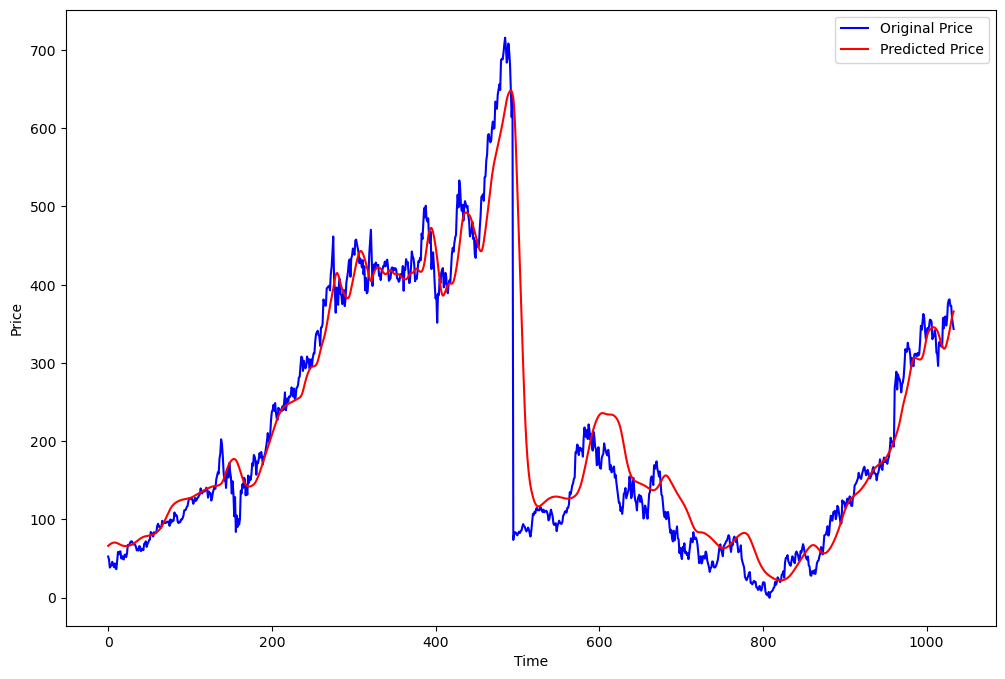

In [140]:
plt.figure(figsize=(12,8))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()